In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# pandas is a python package for reading files and data manipulation like handling missing values, dropping daata....

In [2]:
# Importing the dataset
dataset = pd.read_csv("Salary_Data.csv")

In [3]:
#Contents of dataset
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [6]:
#Retrieve years of experience
X = dataset.iloc[:, :-1]
#X = dataset['YearsExperience']
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [7]:
#Retrieve Salary
Y = dataset.iloc[:, -1:]
Y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


Text(0, 0.5, 'Salary')

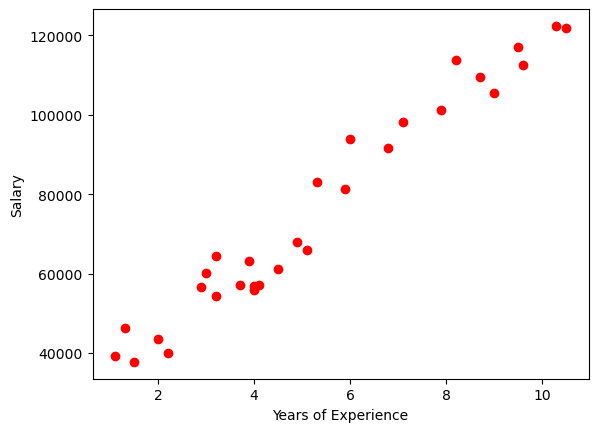

In [8]:
plt.scatter(X, Y, color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [42]:
#Training dataset for training the model and then check the performance of the model on the test dataset.
#Use the train_test_split method from library model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=55)
                                                                    #If data set contains 30 observations then 
                                                                    #Test set contains 10 observations
                                                                    #Training set contains 20 observations


In [43]:
X_train

,YearsExperience
6,3.0
9,3.7
0,1.1
17,5.3
20,6.8
28,10.3
21,7.1
24,8.7
22,7.9
27,9.6


In [11]:
X_test

,YearsExperience
23,8.2
6,3.0
21,7.1
13,4.1
20,6.8
26,9.5


In [12]:
y_train

,Salary
18,81363
11,55794
9,57189
1,46205
15,67938
19,93940
5,56642
10,63218
14,61111
16,66029


In [13]:
y_test

,Salary
23,113812
6,60150
21,98273
13,57081
20,91738
26,116969


In [15]:
#To use the 'LinearRegression' class call it from the library sklearn.linear_model
#First we create an object of the LinearRegression class and 
#call the fit method passing the X_train and y_train.
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[26321.92753477]
[[9199.17762358]]


In [17]:
  #regressor is used in previous step for training the moel. 
 #Now we will use it to predict the results of the test set and 
 #compare the predicted values with the actual values
y_pred = regressor.predict(X_test)


In [18]:
y_pred

array([[101755.18404809],
       [ 53919.46040549],
       [ 91636.08866216],
       [ 64038.55579143],
       [ 88876.33537508],
       [113714.11495874]])

In [19]:
y_test

,Salary
23,113812
6,60150
21,98273
13,57081
20,91738
26,116969


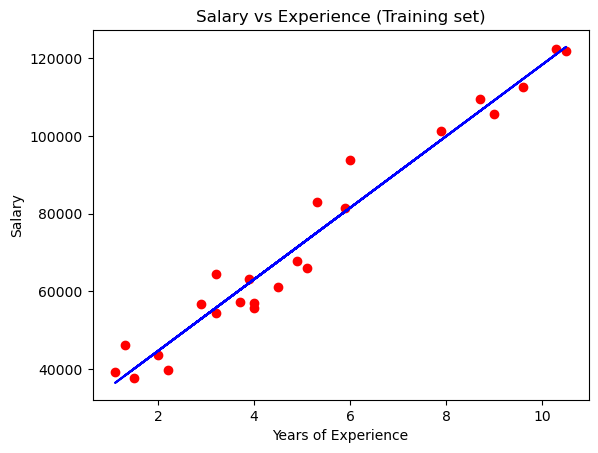

In [20]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

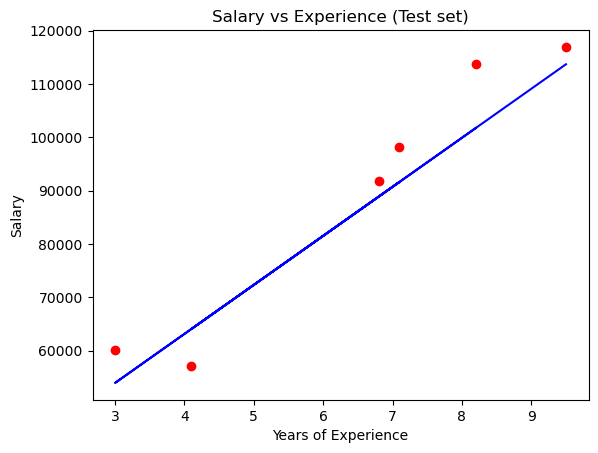

In [21]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [23]:
#Make new predictions for data points that do not exist in the dataset. 
#Like for a person with 11 years experience
new_salary_pred = regressor.predict([[11]])
print('The predicted salary of a person with 11 years experience is ',new_salary_pred)

The predicted salary of a person with 11 years experience is  [[127512.8813941]]


C:\Users\BIPIN P R\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

49237668.38192206

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9115446790608895